**Real Time Data NS3**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

print("=== D2D Results ===")
d2d = pd.read_csv(
    "d2d_results.csv",
    header=0,
    names=["tag","mode","interval_us","throughput_mbps","delay_ms","loss_pct"]
)
d2d = d2d.drop(columns=["tag"])

# --- IAB file ---

iab = pd.read_csv (
    "iab_results.csv",
    header=0,
    names=["tag","hops","throughput_mbps","delay_ms","loss_pct"]
)
iab = iab.drop(columns=["tag"])

display(d2d)
display(iab)

# Build a "scenario" label for x-axis
d2d['scenario'] = d2d['mode'].str.capitalize() + " (" + d2d['interval_us'].astype(str) + " µs)"
d2d




=== D2D Results ===


,mode,interval_us,throughput_mbps,delay_ms,loss_pct
0,direct,100,81.8239,1036.5100,15.665000
1,relay,100,45.3133,1797.2800,50.418800
2,relay,200,50.7657,428.0200,3.290000
3,relay,300,38.0486,1.8527,0.071249


,hops,throughput_mbps,delay_ms,loss_pct
0,1,49.0747,0.490141,0.090
1,2,40.1733,880.352000,5.898
2,3,25.6456,2431.040000,37.412


,mode,interval_us,throughput_mbps,delay_ms,loss_pct,scenario
0,direct,100,81.8239,1036.5100,15.665000,Direct (100 µs)
1,relay,100,45.3133,1797.2800,50.418800,Relay (100 µs)
2,relay,200,50.7657,428.0200,3.290000,Relay (200 µs)
3,relay,300,38.0486,1.8527,0.071249,Relay (300 µs)


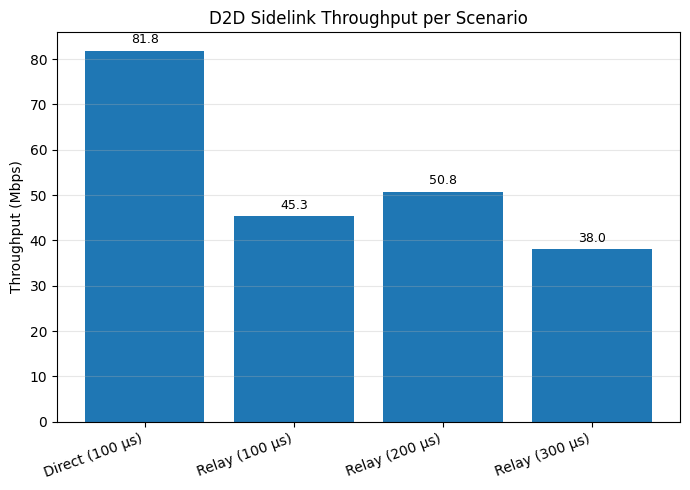

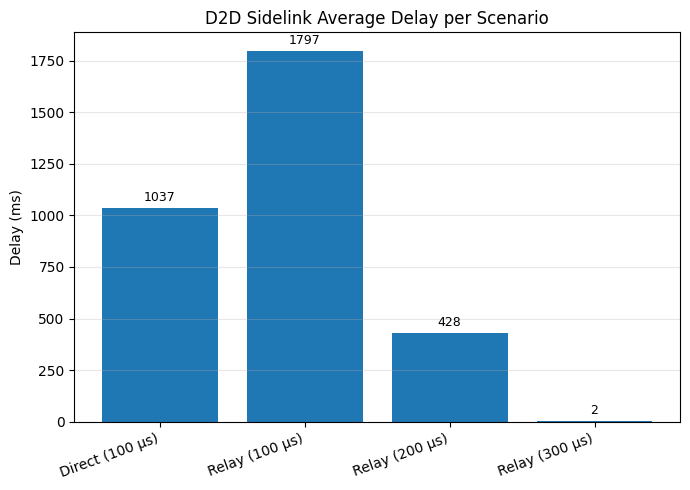

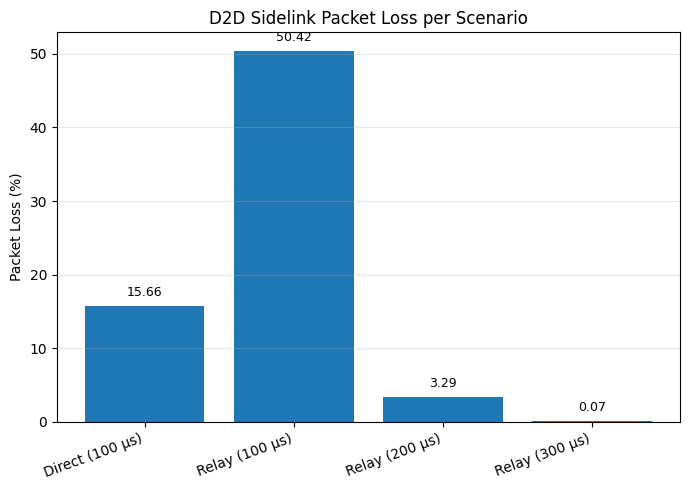

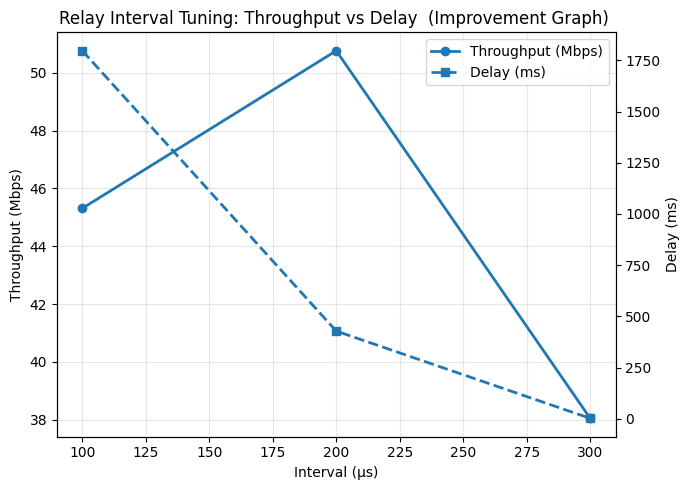

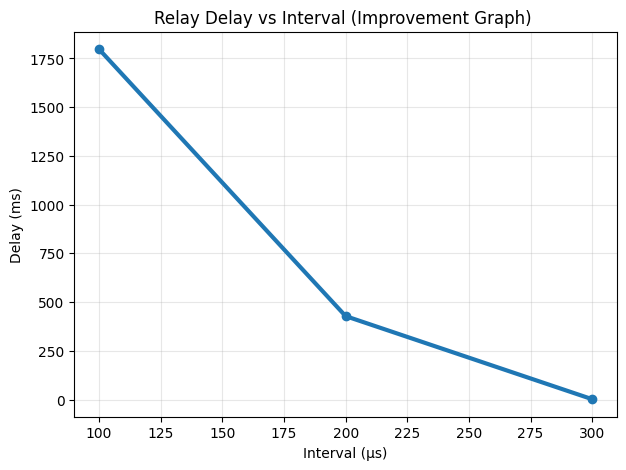

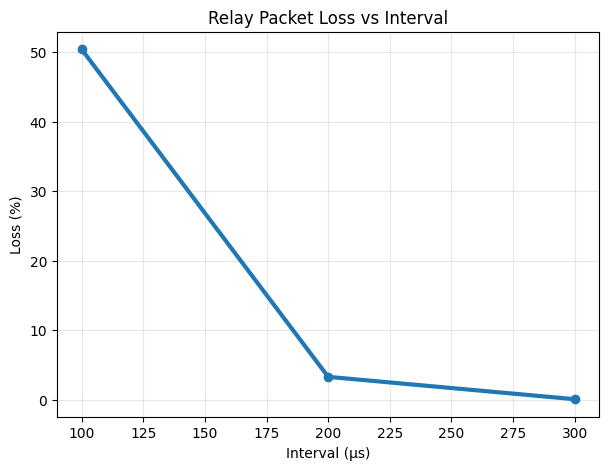

In [30]:
#D2D graphs (Direct vs Relay + Interval tuning)
#D2D Throughput

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
bars = plt.bar(d2d['scenario'], d2d['throughput_mbps'])

plt.title("D2D Sidelink Throughput per Scenario")
plt.ylabel("Throughput (Mbps)")
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=20, ha='right')

# Add value labels on top of bars
for bar, val in zip(bars, d2d['throughput_mbps']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{val:.1f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



#D2D Delay

plt.figure(figsize=(7,5))
bars = plt.bar(d2d['scenario'], d2d['delay_ms'])

plt.title("D2D Sidelink Average Delay per Scenario")
plt.ylabel("Delay (ms)")
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=20, ha='right')

for bar, val in zip(bars, d2d['delay_ms']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
             f"{val:.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



#D2D Packet Loss
plt.figure(figsize=(7,5))
bars = plt.bar(d2d['scenario'], d2d['loss_pct'])

plt.title("D2D Sidelink Packet Loss per Scenario")
plt.ylabel("Packet Loss (%)")
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=20, ha='right')

for bar, val in zip(bars, d2d['loss_pct']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{val:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()







relay = d2d[d2d['mode'] == 'relay'].sort_values('interval_us')

fig, ax1 = plt.subplots(figsize=(7,5))

ax1.set_title("Relay Interval Tuning: Throughput vs Delay  (Improvement Graph) ")
ax1.set_xlabel("Interval (µs)")

# Throughput on left axis
ax1.plot(relay['interval_us'], relay['throughput_mbps'], marker='o', linewidth=2, label='Throughput (Mbps)')
ax1.set_ylabel("Throughput (Mbps)")
ax1.grid(True, which='both', axis='both', alpha=0.3)

# Second y-axis for delay
ax2 = ax1.twinx()
ax2.plot(relay['interval_us'], relay['delay_ms'], marker='s', linestyle='--', linewidth=2, label='Delay (ms)')
ax2.set_ylabel("Delay (ms)")

# Combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines+lines2, labels+labels2, loc='upper right')

plt.tight_layout()
plt.show()



##Relay Delay vs Interval (Improvement Graph)

plt.figure(figsize=(7,5))
plt.plot(relay['interval_us'], relay['delay_ms'], marker='o', linewidth=3)
plt.title("Relay Delay vs Interval (Improvement Graph) ")
plt.xlabel("Interval (µs)")
plt.ylabel("Delay (ms)")
plt.grid(True, alpha=0.3)
plt.show()



#Packet Loss vs Interval (Improvement Graph)
plt.figure(figsize=(7,5))
plt.plot(relay['interval_us'], relay['loss_pct'], marker='o', linewidth=3)
plt.title("Relay Packet Loss vs Interval")
plt.xlabel("Interval (µs)")
plt.ylabel("Loss (%)")
plt.grid(True, alpha=0.3)
plt.show()


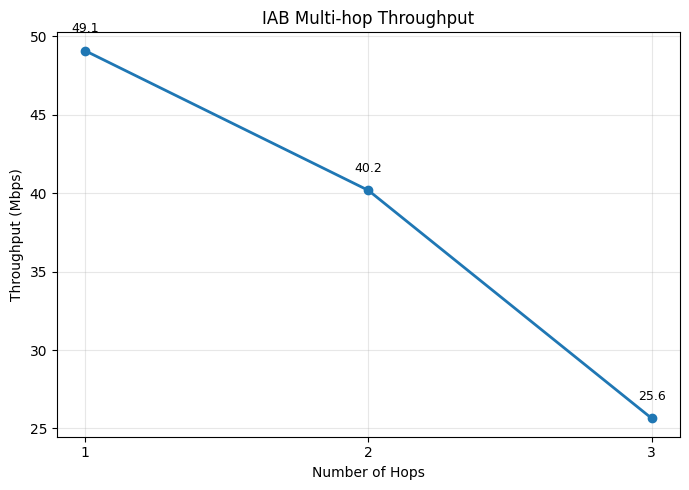

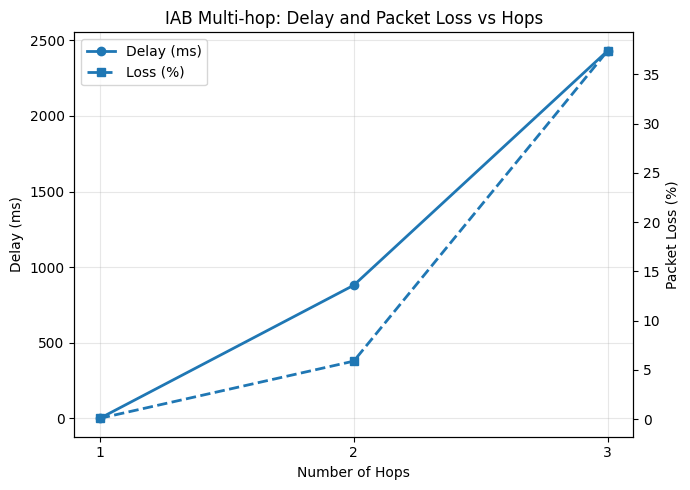

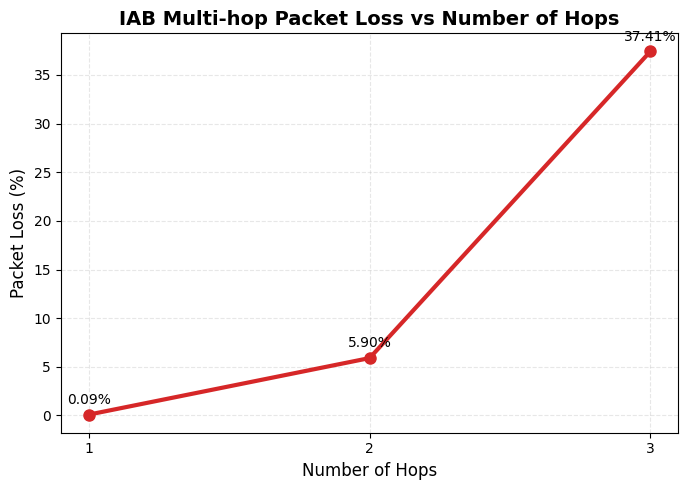

In [28]:
#IAB Multi-hop graphs

#Throughput vs Hops

iab_sorted = iab.sort_values('hops')

plt.figure(figsize=(7,5))
plt.plot(iab_sorted['hops'], iab_sorted['throughput_mbps'], marker='o', linewidth=2)

plt.title("IAB Multi-hop Throughput")
plt.xlabel("Number of Hops")
plt.ylabel("Throughput (Mbps)")
plt.grid(True, alpha=0.3)
plt.xticks(iab_sorted['hops'])

for x, y in zip(iab_sorted['hops'], iab_sorted['throughput_mbps']):
    plt.text(x, y+1, f"{y:.1f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



#Delay vs Hops

fig, ax1 = plt.subplots(figsize=(7,5))

ax1.set_title("IAB Multi-hop: Delay and Packet Loss vs Hops")
ax1.set_xlabel("Number of Hops")

ax1.plot(iab_sorted['hops'], iab_sorted['delay_ms'], marker='o', linewidth=2, label='Delay (ms)')
ax1.set_ylabel("Delay (ms)")
ax1.grid(True, alpha=0.3)
ax1.set_xticks(iab_sorted['hops'])

ax2 = ax1.twinx()
ax2.plot(iab_sorted['hops'], iab_sorted['loss_pct'], marker='s', linestyle='--', linewidth=2, label='Loss (%)')
ax2.set_ylabel("Packet Loss (%)")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines+lines2, labels+labels2, loc='upper left')

plt.tight_layout()
plt.show()




#Packet Loss vs Hops

import matplotlib.pyplot as plt

# Sort by hop count to ensure correct ordering
iab_sorted = iab.sort_values("hops")

plt.figure(figsize=(7,5))

# Plot line
plt.plot(
    iab_sorted["hops"],
    iab_sorted["loss_pct"],
    marker="o",
    markersize=8,
    linewidth=3,
    color="#d62728",      # red tone for loss
    label="Packet Loss (%)"
)

# Title and labels
plt.title("IAB Multi-hop Packet Loss vs Number of Hops", fontsize=14, fontweight="bold")
plt.xlabel("Number of Hops", fontsize=12)
plt.ylabel("Packet Loss (%)", fontsize=12)

# Grid & ticks
plt.grid(True, alpha=0.3, linestyle="--")
plt.xticks(iab_sorted["hops"])

# Add value labels above each point
for x, y in zip(iab_sorted["hops"], iab_sorted["loss_pct"]):
    plt.text(
        x, y + max(iab_sorted["loss_pct"])*0.03,  # small offset above point
        f"{y:.2f}%",
        ha="center",
        fontsize=10
    )

plt.tight_layout()
plt.show()

